In [ ]:
print('test')

In [1]:
def summary_table(df):
    summary = pd.DataFrame(dict(dataFeatures = df.columns,
                                  dataType = df.dtypes,
                                  null = df.isna().sum(),
                                  null_pct = round(df.isna().sum() / len(df) *100,2),
                                  unique = df.nunique(),
#                                   uniqueSample = [list(df[i].drop_duplicates().sample(2)) for i in df.columns]
                               )
                           ).reset_index(drop=True)
    summary['unique_pct'] = round(summary['unique'] / len(df) *100,2)
    return summary

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import missingno as msno

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns' ,40)
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

# The Dataset

<span style='color:Indianred'>**A. Brief Knowledge from DataSet :**</span>

<p align = 'justify' style="text-align:justify">ACLED collects and codes reported information on political violence, demonstrations (rioting and protesting) and select non violent, politically important events. It aims to capture the modes, frequency and intensity of political violence and opposition as it occurs. Political violence is defined as the use of force by a group with a political purpose or motivation. ACLED records political violence through its constituent events, the intent of which is to produce a comprehensive overview of all forms of political disorder, expressed through violence and demonstrations, within and across states. A politically violent event is a single altercation where often force is used by one or more groups toward a political end, although some non-violent instances – including protests and strategic developments – are included in the dataset to capture the potential pre-cursors or critical junctures of a violent conflict<p>

**Features Description**

0. `data_id` : Key.</ul>
1. `iso` : A numeric code for each individual country.</ul>
2. `event_id_cnty` : An individual event identifier by number and country acronym.</ul>
3. `event_id_no_cnty`: An individual event numeric identifier.</ul>
4. `event_date`: Recorded as Day / Month / Year.</ul>
5. `year` : The year in which an event took place.</ul>
6. `time_precision`: A numeric code indicating the level of certainty of the date coded for the event (1-3).
7. `event_type` : The type of event.
8. `sub_event_type` : The type of sub-event.
9. `actor1` : A named actor involved in the event.
10. `assoc_actor_1` : The named actor associated with or identifying with ACTOR1 in one specific event.
11. `inter1` : A numeric code indicating the type of ACTOR1.
12. `interaction`: A numeric code indicating the interaction between types of ACTOR1 and ACTOR2. Coded as an interaction between actor.
13. `region`: The region of the world where the event took place.
14. `country` : The country in which the event took place.
15. `admin1` : The largest sub-national administrative region in which the event took place.
16. `admin2` : The second largest sub-national administrative region in which the event took place.
17. `admin3` : The third largest sub-national administrative region in which the event took place.
18. `location` : The location in which the event took place.
19. `latitude` : The latitude of the location.
20. `longitude` : The longitude of the location.
21. `geo_precision` : A numeric code indicating the level of certainty of the location coded for the event.
22. `source` : The source(s) used to code the event.
23. `source_scale` : The geographic scale of the sources used to code the event.
24. `notes` : Short description of the event.
25. `fatalities` : Number or estimate of fatalities due to event. These are frequently different across reports.
26. `timestamp` : Timestamp
27. `iso3` : ISO CC Code

In [3]:
df = pd.read_csv('../../Data/raw/ACLED Protest & Violence Indonesia.csv')
dataset = df.copy()
display(dataset.head(3), dataset.shape)

,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,5590925,360,IDN520,520,31 January 2019,2019,1,Battles,Armed clash,TPNPB: West Papua National Liberation Army,NaN,2,12,South-Eastern Asia,Indonesia,Papua,Nduga,Mapenduma,Mapenduma,-4.39,138.23,1,Jakarta Post,National,"On January 31, 2019, in Mapenduma village (Ndu...",0,1563366749,IDN
1,5590925,360,IDN520,520,31 January 2019,2019,1,Battles,Armed clash,Military Forces of Indonesia (2014-),NaN,1,12,South-Eastern Asia,Indonesia,Papua,Nduga,Mapenduma,Mapenduma,-4.39,138.23,1,Jakarta Post,National,"On January 31, 2019, in Mapenduma village (Ndu...",0,1563366749,IDN
2,6301918,360,IDN526,526,31 January 2019,2019,1,Violence against civilians,Attack,Police Forces of Indonesia (2014-),NaN,1,17,South-Eastern Asia,Indonesia,Papua,Jayawijaya,Wamena,Wamena,-4.10,138.94,1,Pattaya One,Regional,"On 31 January 2019, a Polish man in the police...",0,1572403769,IDN


(3121, 28)

In [36]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3121 entries, 0 to 3120
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_id           3121 non-null   int64  
 1   iso               3121 non-null   int64  
 2   event_id_cnty     3121 non-null   object 
 3   event_id_no_cnty  3121 non-null   int64  
 4   event_date        3121 non-null   object 
 5   year              3121 non-null   int64  
 6   time_precision    3121 non-null   int64  
 7   event_type        3121 non-null   object 
 8   sub_event_type    3121 non-null   object 
 9   actor1            3121 non-null   object 
 10  assoc_actor_1     1728 non-null   object 
 11  inter1            3121 non-null   int64  
 12  interaction       3121 non-null   int64  
 13  region            3121 non-null   object 
 14  country           3121 non-null   object 
 15  admin1            3121 non-null   object 
 16  admin2            3121 non-null   object 


## Overview the Dataset

In [37]:
summary_table(dataset)

,dataFeatures,dataType,null,null_pct,unique,unique_pct
0,data_id,int64,0,0.00,2270,72.73
1,iso,int64,0,0.00,1,0.03
2,event_id_cnty,object,0,0.00,2270,72.73
3,event_id_no_cnty,int64,0,0.00,2270,72.73
4,event_date,object,0,0.00,927,29.70
5,year,int64,0,0.00,5,0.16
6,time_precision,int64,0,0.00,3,0.10
7,event_type,object,0,0.00,6,0.19
8,sub_event_type,object,0,0.00,17,0.54
9,actor1,object,0,0.00,40,1.28


In [38]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
data_id,3121.00,6405315.37,480903.03,4598209.00,6270999.00,6663374.00,6664103.00,6712526.00
iso,3121.00,360.00,0.00,360.00,360.00,360.00,360.00,360.00
event_id_no_cnty,3121.00,1941.43,1121.08,1.00,616.00,2316.00,2867.00,3414.00
year,3121.00,2016.67,1.28,2015.00,2015.00,2017.00,2018.00,2019.00
time_precision,3121.00,1.04,0.23,1.00,1.00,1.00,1.00,3.00
inter1,3121.00,4.70,2.19,1.00,3.00,6.00,6.00,8.00
interaction,3121.00,39.12,21.49,10.00,16.00,55.00,60.00,78.00
latitude,3121.00,-4.11,3.56,-10.17,-6.82,-5.15,-2.53,5.89
longitude,3121.00,116.90,13.85,95.21,106.81,112.54,131.26,140.86
geo_precision,3121.00,1.13,0.37,1.00,1.00,1.00,1.00,3.00


In [39]:
dataset.describe(include='object').T

,count,unique,top,freq
event_id_cnty,3121,2270,IDN603,2
event_date,3121,927,19 December 2017,32
event_type,3121,6,Protests,1808
sub_event_type,3121,17,Peaceful protest,1365
actor1,3121,40,Protesters (Indonesia),1581
assoc_actor_1,1728,220,Labour Group (Indonesia),367
region,3121,1,South-Eastern Asia,3121
country,3121,1,Indonesia,3121
admin1,3121,34,Papua,683
admin2,3121,277,Central Jakarta,231


**Missing Values**

<Figure size 576x432 with 0 Axes>

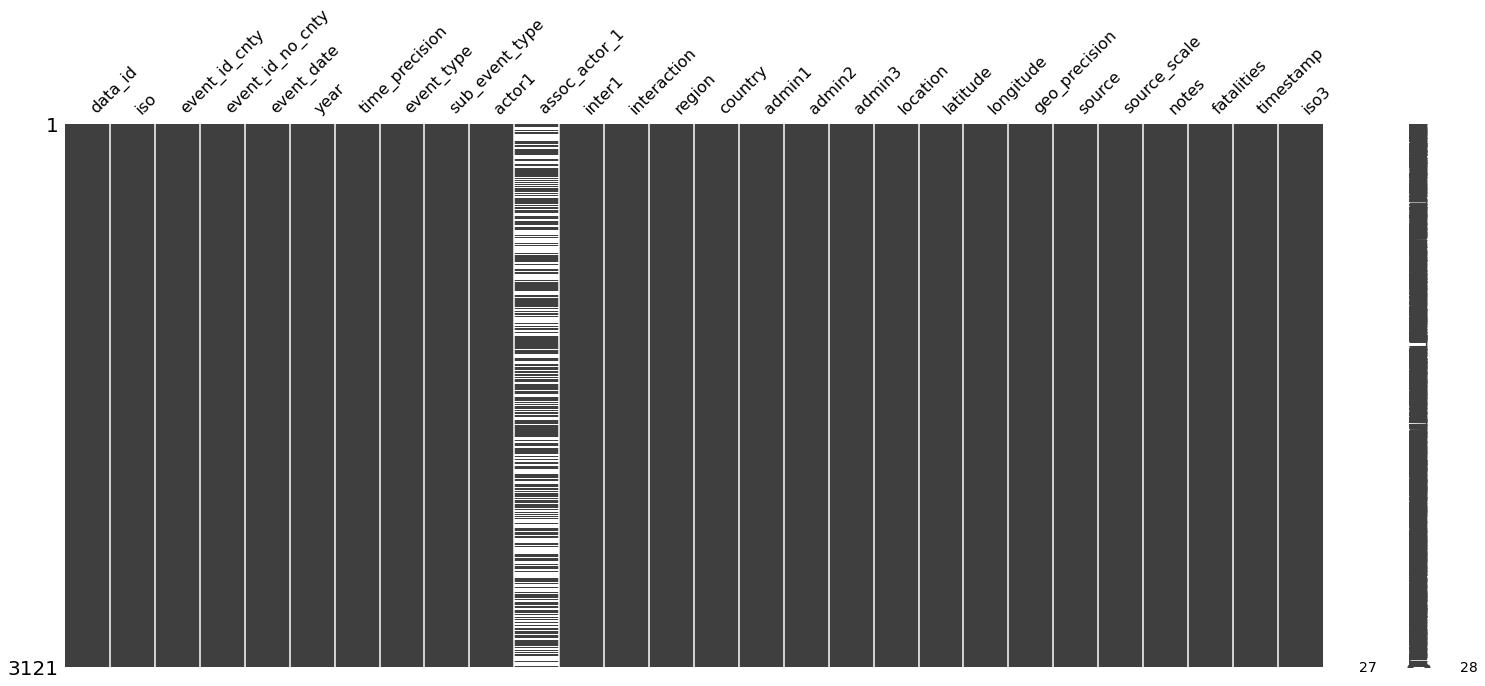

In [40]:
plt.figure(figsize=(8,6))
msno.matrix(dataset)
plt.show()

Based on summary data and describing over all of the columns. Dropping the columns where have a **one (1) unique** values is not a big deal.

In [41]:
dataset.drop(labels=['region','country','iso','iso3'],axis=1, inplace=True)

**Duplicates Values**

## Missing Values Exploration

Which **`assoc_actor_1`** related by features?

- `actor1` : A named actor involved in the event.
- `assoc_actor_1` : The named actor associated with or identifying with ACTOR1 in one specific event.
- `inter1` : A numeric code indicating the type of ACTOR1.
- `interaction`: A numeric code indicating the interaction between types of ACTOR1 and ACTOR2. Coded as an interaction between actor

In [42]:
misact = dataset[['actor1','assoc_actor_1', 'inter1', 'interaction']]
misact

,actor1,assoc_actor_1,inter1,interaction
0,TPNPB: West Papua National Liberation Army,NaN,2,12
1,Military Forces of Indonesia (2014-),NaN,1,12
2,Police Forces of Indonesia (2014-),NaN,1,17
3,Civilians (Poland),Prisoners (Poland),7,17
4,Protesters (Indonesia),NaN,6,60
...,...,...,...,...
3116,Police Forces of Indonesia (2014-),NaN,1,16
3117,TPNPB: West Papua National Liberation Army,NaN,2,12
3118,Military Forces of Indonesia (2014-),Private Security Forces (Indonesia),1,12
3119,Rioters (Indonesia),Muslim Group (Indonesia),5,57


In [43]:
misact[misact['actor1'] == 'Military Forces of Indonesia (2014-)']['interaction'].unique()

array([12, 17, 11, 16, 14, 15, 13], dtype=int64)

<span style='color:Red'>**What kind of relations are they?**</span>

In [44]:
dataset['assoc_actor_1'].unique().tolist()

[nan,
 'Prisoners (Poland)',
 'Students (Indonesia)',
 'Police Forces of Indonesia (2014-)',
 'WALHI: Indonesian Forum for the Environment',
 'AJI: Alliance of Independent Journalists, Journalists (Indonesia)',
 'Labour Group (Indonesia)',
 'Teachers (Indonesia), Muslim Group (Indonesia)',
 'Health Workers (Indonesia)',
 'Muslim Group (Indonesia)',
 'IPK: The Association for Youth Employment',
 'FKPPI: Community Forum for Sons and Daughters of the Police and Armed Forces',
 'Students (Indonesia), BEM SI: The National Association of University Student Executive Bodies',
 'Government of Indonesia (2014-)',
 'Military Forces of Indonesia (2014-), Police Forces of Indonesia (2014-), Pekanbaru Communal Militia (Indonesia), Vigilante Group (Indonesia)',
 'Health Workers (Indonesia), LGBT (Indonesia)',
 'Prisoners (Indonesia)',
 'Fishermen (Indonesia)',
 'KNPB: National Committee for West Papua, Papuan Ethnic Group (Indonesia)',
 'KNPB: National Committee for West Papua, Papuan Ethnic Group (

In [45]:
dataset.groupby(['actor1','assoc_actor_1', 'event_type']).agg({'admin1': lambda x : len(x)})

admin1
actor1                                    assoc_actor_1                                      event_type                        
Civilians (Indonesia)                     Ahmadiyya Muslim Group (Indonesia)                 Riots                            2
                                          Ahmadiyya Muslim Group (Indonesia), Women (Indo... Strategic developments           1
                                          Buddhist Group (Indonesia)                         Strategic developments           1
                                                                                             Violence against civilians       1
                                          Buddhist Group (Indonesia), Chinese Ethnic Grou... Riots                            1
...                                                                                                                         ...
Unidentified Armed Group (Indonesia)      Military Forces of Indonesia (2014-)               Violence against civilians       1
                                          Muslim Group (Indonesia)                           Violence against civilians       1
                                          Police Forces of Indonesia (2014-) Prison Guards   Violence against civilians       1
                                          Prisoners (Indonesia)                              Battles                          3
Unidentified Communal Militia (Indonesia) Vigilante Group (Indonesia)                        Battles                          1

[330 rows x 1 columns]

In [46]:
dataset[dataset['assoc_actor_1'].isna()]

,data_id,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,assoc_actor_1,inter1,interaction,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
0,5590925,IDN520,520,31 January 2019,2019,1,Battles,Armed clash,TPNPB: West Papua National Liberation Army,NaN,2,12,Papua,Nduga,Mapenduma,Mapenduma,-4.39,138.23,1,Jakarta Post,National,"On January 31, 2019, in Mapenduma village (Ndu...",0,1563366749
1,5590925,IDN520,520,31 January 2019,2019,1,Battles,Armed clash,Military Forces of Indonesia (2014-),NaN,1,12,Papua,Nduga,Mapenduma,Mapenduma,-4.39,138.23,1,Jakarta Post,National,"On January 31, 2019, in Mapenduma village (Ndu...",0,1563366749
2,6301918,IDN526,526,31 January 2019,2019,1,Violence against civilians,Attack,Police Forces of Indonesia (2014-),NaN,1,17,Papua,Jayawijaya,Wamena,Wamena,-4.10,138.94,1,Pattaya One,Regional,"On 31 January 2019, a Polish man in the police...",0,1572403769
4,5590924,IDN519,519,30 January 2019,2019,1,Protests,Peaceful protest,Protesters (Indonesia),NaN,6,60,Jakarta,South Jakarta,Cilandak,Lebak Bulus,-6.30,106.78,1,Jakarta Post,National,"On January 30, 2019, in Lebak Bulus village of...",0,1563366749
6,6712526,IDN3414,3414,30 January 2019,2019,1,Riots,Violent demonstration,Police Forces of Indonesia (2014-),NaN,1,15,Banten,Tangerang,Tangerang,Tangerang,-6.18,106.58,1,Tribunnews,National,"On Jan 30, 2019, dozens of students held a dem...",0,1578511387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113,5451313,IDN237,237,01 January 2015,2015,1,Battles,Armed clash,Unidentified Armed Group (Indonesia),NaN,3,13,Papua,Deiyai,Tigi,Tigi,-3.97,136.27,2,Jakarta Post,National,"On Jan 1, a top police officer was shot dead b...",1,1561473734
3114,5451313,IDN237,237,01 January 2015,2015,1,Battles,Armed clash,Police Forces of Indonesia (2014-),NaN,1,13,Papua,Deiyai,Tigi,Tigi,-3.97,136.27,2,Jakarta Post,National,"On Jan 1, a top police officer was shot dead b...",1,1561473734
3116,6663271,IDN2299,2299,01 January 2015,2015,1,Protests,Protest with intervention,Police Forces of Indonesia (2014-),NaN,1,16,Jakarta,Jakarta,Jakarta,Jakarta,-6.21,106.84,1,HumanRightsPapua,Other,"On 1 January 2015, there was a violent dispers...",0,1576600005
3117,6662768,IDN238,238,01 January 2015,2015,1,Battles,Armed clash,TPNPB: West Papua National Liberation Army,NaN,2,12,Papua,Mimika,Kuala Kencana,Kuala Kencana,-4.42,136.86,1,"Tempo, Kompas, Papuans Behind Bars, DPA",National-International,"On 1 January 2015, two second brigadier office...",3,1576599991


The **`assoc_actor_1`** has a spesific names of category,groups,or local community even an organizational specified names who takes an Protest or Violence. I don't think its an important values to keep going the Data Analysis, so I'm gonna **drop that columns.**

Then how about **`interaction`**?
Description of the features reveal that was an interaction between ACTOR1 and ACTOR2, our dataset doesn't have a ACTOR2 columns so just **give an assumption there were a pair of unique code on `actor1` which an associated by each other.**

In [47]:
dataset.drop(labels=['assoc_actor_1'], inplace=True, axis=1)

Let's get an evidence from the dataset

In [48]:
dataset[dataset['interaction'] == 15]

,data_id,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,inter1,interaction,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
5,6712526,IDN3414,3414,30 January 2019,2019,1,Riots,Violent demonstration,Rioters (Indonesia),5,15,Banten,Tangerang,Tangerang,Tangerang,-6.18,106.58,1,Tribunnews,National,"On Jan 30, 2019, dozens of students held a dem...",0,1578511387
6,6712526,IDN3414,3414,30 January 2019,2019,1,Riots,Violent demonstration,Police Forces of Indonesia (2014-),1,15,Banten,Tangerang,Tangerang,Tangerang,-6.18,106.58,1,Tribunnews,National,"On Jan 30, 2019, dozens of students held a dem...",0,1578511387
28,6712522,IDN3410,3410,23 January 2019,2019,1,Riots,Violent demonstration,Rioters (Indonesia),5,15,Aceh,Southeast Aceh,Babussalam,Babussalam,3.50,97.80,1,Tribunnews,National,"On Jan 23, 2019, a group of students held a de...",0,1578511387
29,6712522,IDN3410,3410,23 January 2019,2019,1,Riots,Violent demonstration,Police Forces of Indonesia (2014-),1,15,Aceh,Southeast Aceh,Babussalam,Babussalam,3.50,97.80,1,Tribunnews,National,"On Jan 23, 2019, a group of students held a de...",0,1578511387
41,5590915,IDN510,510,17 January 2019,2019,1,Riots,Mob violence,Rioters (Indonesia),5,15,Jakarta,Central Jakarta,Tanah Abang,Tanah Abang,-6.21,106.81,1,Jakarta Post,National,"On January 17, 2019, in Tanah Abang subdistric...",0,1563366749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3032,6663537,IDN2328,2328,06 February 2015,2015,1,Riots,Mob violence,Police Forces of Indonesia (2014-),1,15,Lampung,East Lampung,Purbolinggo,Purbolinggo,-4.97,105.47,1,Kompas,National,"On February 6, 2015, a riot broke out in Purbo...",0,1576600006
3047,6663056,IDN2320,2320,29 January 2015,2015,1,Riots,Violent demonstration,Rioters (Indonesia),5,15,Jakarta,Central Jakarta,Central Jakarta,Central Jakarta,-6.18,106.80,1,Detik,National,"On January 29, 2015, dozens of students from G...",0,1576600004
3048,6663056,IDN2320,2320,29 January 2015,2015,1,Riots,Violent demonstration,Police Forces of Indonesia (2014-),1,15,Jakarta,Central Jakarta,Central Jakarta,Central Jakarta,-6.18,106.80,1,Detik,National,"On January 29, 2015, dozens of students from G...",0,1576600004
3098,6663937,IDN2304,2304,10 January 2015,2015,1,Riots,Mob violence,Rioters (Indonesia),5,15,Papua,Mimika,Timika,Timika,-4.78,136.55,1,Tempo,National,"On January 10, 2015, around 30 Papuan people t...",0,1576600007


## Removing Unnecessary Features

Wow! See, the assumption almost right. The interaction of its **`actor`** was involved in the different times and places!

Let's check another insights from **`event_id_cnty`** or **`event_id_no_cnty`**, whereas an unique identifier for each event.

In [49]:
dataset[dataset['event_id_cnty'] == 'IDN3414']

,data_id,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,inter1,interaction,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
5,6712526,IDN3414,3414,30 January 2019,2019,1,Riots,Violent demonstration,Rioters (Indonesia),5,15,Banten,Tangerang,Tangerang,Tangerang,-6.18,106.58,1,Tribunnews,National,"On Jan 30, 2019, dozens of students held a dem...",0,1578511387
6,6712526,IDN3414,3414,30 January 2019,2019,1,Riots,Violent demonstration,Police Forces of Indonesia (2014-),1,15,Banten,Tangerang,Tangerang,Tangerang,-6.18,106.58,1,Tribunnews,National,"On Jan 30, 2019, dozens of students held a dem...",0,1578511387


In [50]:
dataset[dataset['event_id_cnty'] == 'IDN526']

,data_id,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,inter1,interaction,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp
2,6301918,IDN526,526,31 January 2019,2019,1,Violence against civilians,Attack,Police Forces of Indonesia (2014-),1,17,Papua,Jayawijaya,Wamena,Wamena,-4.10,138.94,1,Pattaya One,Regional,"On 31 January 2019, a Polish man in the police...",0,1572403769
3,6301918,IDN526,526,31 January 2019,2019,1,Violence against civilians,Attack,Civilians (Poland),7,17,Papua,Jayawijaya,Wamena,Wamena,-4.10,138.94,1,Pattaya One,Regional,"On 31 January 2019, a Polish man in the police...",0,1572403769


Let's take a look, from unique values count from `summary_columns` and the pieces of dataframe above. The `timestamp`, `data_id` or `event_id_no_cnty` removing that features doesn't affect the EDA after checking **a missing and duplicated values**.

In [51]:
dataset.drop(labels=['event_id_no_cnty','timestamp','data_id'], axis=1, inplace=True)

## Date Time Features

In [52]:
dataset['event_date'] = pd.to_datetime(dataset['event_date'])
dataset['year'] = dataset['event_date'].dt.strftime('%Y')
dataset['event_date'] = dataset['event_date'].dt.strftime('%d-%b')

In [53]:
display(dataset.head(2), dataset.shape)

,event_id_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,inter1,interaction,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities
0,IDN520,31-Jan,2019,1,Battles,Armed clash,TPNPB: West Papua National Liberation Army,2,12,Papua,Nduga,Mapenduma,Mapenduma,-4.39,138.23,1,Jakarta Post,National,"On January 31, 2019, in Mapenduma village (Ndu...",0
1,IDN520,31-Jan,2019,1,Battles,Armed clash,Military Forces of Indonesia (2014-),1,12,Papua,Nduga,Mapenduma,Mapenduma,-4.39,138.23,1,Jakarta Post,National,"On January 31, 2019, in Mapenduma village (Ndu...",0


(3121, 20)

## Nominal Features

Changing all type nominal features as a categorical data types whereas the features selected are ordinal(*ranking*) datatypes, otherwise to speed up processing in pandas (*tactics*) or help analysts to get an output as ordered values . Its features:

- `time_precision`: A numeric code indicating the level of certainty of the date coded for the event (1-3).
-  `geo_precision` : A numeric code indicating the level of certainty of the location coded for the event.
-  `fatalities` : Number or estimate of fatalities due to event. These are frequently different across reports.
- `inter1` : A numeric code indicating the type of ACTOR1.
- `interaction`: A numeric code indicating the interaction between types of ACTOR1 and ACTOR2. Coded as an interaction between actor.

In [54]:
dataset['time_precision'] = pd.Categorical(dataset['time_precision'], ordered=True, categories=dataset['time_precision'].unique().tolist())
dataset['geo_precision'] = pd.Categorical(dataset['geo_precision'], ordered=True, categories=dataset['geo_precision'].unique().tolist())
dataset['fatalities'] = pd.Categorical(dataset['fatalities'], ordered=True, categories=np.sort(dataset['fatalities'].unique()).tolist())
dataset['interaction'] = pd.Categorical(dataset['interaction'], ordered=True, categories=dataset['interaction'].unique().tolist())
dataset['inter1'] = pd.Categorical(dataset['inter1'], ordered=True, categories=dataset['inter1'].unique().tolist())

In [55]:
dataset

,event_id_cnty,event_date,year,time_precision,event_type,sub_event_type,actor1,inter1,interaction,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities
0,IDN520,31-Jan,2019,1,Battles,Armed clash,TPNPB: West Papua National Liberation Army,2,12,Papua,Nduga,Mapenduma,Mapenduma,-4.39,138.23,1,Jakarta Post,National,"On January 31, 2019, in Mapenduma village (Ndu...",0
1,IDN520,31-Jan,2019,1,Battles,Armed clash,Military Forces of Indonesia (2014-),1,12,Papua,Nduga,Mapenduma,Mapenduma,-4.39,138.23,1,Jakarta Post,National,"On January 31, 2019, in Mapenduma village (Ndu...",0
2,IDN526,31-Jan,2019,1,Violence against civilians,Attack,Police Forces of Indonesia (2014-),1,17,Papua,Jayawijaya,Wamena,Wamena,-4.10,138.94,1,Pattaya One,Regional,"On 31 January 2019, a Polish man in the police...",0
3,IDN526,31-Jan,2019,1,Violence against civilians,Attack,Civilians (Poland),7,17,Papua,Jayawijaya,Wamena,Wamena,-4.10,138.94,1,Pattaya One,Regional,"On 31 January 2019, a Polish man in the police...",0
4,IDN519,30-Jan,2019,1,Protests,Peaceful protest,Protesters (Indonesia),6,60,Jakarta,South Jakarta,Cilandak,Lebak Bulus,-6.30,106.78,1,Jakarta Post,National,"On January 30, 2019, in Lebak Bulus village of...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,IDN2299,01-Jan,2015,1,Protests,Protest with intervention,Police Forces of Indonesia (2014-),1,16,Jakarta,Jakarta,Jakarta,Jakarta,-6.21,106.84,1,HumanRightsPapua,Other,"On 1 January 2015, there was a violent dispers...",0
3117,IDN238,01-Jan,2015,1,Battles,Armed clash,TPNPB: West Papua National Liberation Army,2,12,Papua,Mimika,Kuala Kencana,Kuala Kencana,-4.42,136.86,1,"Tempo, Kompas, Papuans Behind Bars, DPA",National-International,"On 1 January 2015, two second brigadier office...",3
3118,IDN238,01-Jan,2015,1,Battles,Armed clash,Military Forces of Indonesia (2014-),1,12,Papua,Mimika,Kuala Kencana,Kuala Kencana,-4.42,136.86,1,"Tempo, Kompas, Papuans Behind Bars, DPA",National-International,"On 1 January 2015, two second brigadier office...",3
3119,IDN2300,01-Jan,2015,1,Riots,Mob violence,Rioters (Indonesia),5,57,Aceh,Sabang,Sabang,Sabang,5.89,95.32,1,Kompas,National,"On January 1, 2015, an unidentified Muslim gro...",0


## Categorical Features

Understanding those features to get an insight about the values.

In [56]:
dataset['event_type'].unique()

array(['Battles', 'Violence against civilians', 'Protests', 'Riots',
       'Strategic developments', 'Explosions/Remote violence'],
      dtype=object)

In [57]:
dataset['sub_event_type'].unique()

array(['Armed clash', 'Attack', 'Peaceful protest',
       'Violent demonstration', 'Looting/property destruction',
       'Mob violence', 'Protest with intervention',
       'Excessive force against protesters', 'Arrests', 'Sexual violence',
       'Disrupted weapons use', 'Other', 'Grenade',
       'Remote explosive/landmine/IED', 'Suicide bomb',
       'Abduction/forced disappearance', 'Change to group/activity'],
      dtype=object)

In [58]:
dataset['actor1'].unique()

array(['TPNPB: West Papua National Liberation Army',
       'Military Forces of Indonesia (2014-)',
       'Police Forces of Indonesia (2014-)', 'Civilians (Poland)',
       'Protesters (Indonesia)', 'Rioters (Indonesia)',
       'Private Security Forces (Indonesia)',
       'Unidentified Armed Group (Indonesia)', 'Civilians (Indonesia)',
       'FPI: Islamic Defenders Front', 'MIT: Mujahidin Indonesia Timur',
       'Police Forces of Indonesia (2014-) Prison Guards',
       'Police Forces of Indonesia (2014-) Mobile Brigade Corps',
       'Protesters (International)', 'Protesters (Afghanistan)',
       'Islamist Militia (Indonesia)',
       'Unidentified Communal Militia (Indonesia)',
       'JAD: Jemaah Ansharut Daulah',
       'Police Forces of Indonesia (2014-) Detachment 88',
       'Government of Indonesia (2014-)',
       'Police Forces of Indonesia (2014-) Wilayatul Hisbah',
       'Suku Anak Dalam Ethnic Militia (Indonesia)',
       'Tangga Baru Communal Militia (Indonesia)',


Assuming:
- **`event_type`** is a general event of a protest
- **`sub_event_type`** is a little specified description what kind of main event was.
- **`actor1`** Communal/Organizational were involved.<br>

Changing **`event_type`** to Categorical features to ease Exploration Data Analysis.

In [59]:
dataset['event_type'] = pd.Categorical(dataset['event_type'], categories=dataset['event_type'].unique().tolist(), ordered=False)

The Dataset was ready for exploration.

# Statistical Methods

In [66]:
df[['time_precision','geo_precision','fatalities','inter1','interaction']].describe().T

,count,mean,std,min,25%,50%,75%,max
time_precision,3121.00,1.04,0.23,1.00,1.00,1.00,1.00,3.00
geo_precision,3121.00,1.13,0.37,1.00,1.00,1.00,1.00,3.00
fatalities,3121.00,0.24,1.01,0.00,0.00,0.00,0.00,19.00
inter1,3121.00,4.70,2.19,1.00,3.00,6.00,6.00,8.00
interaction,3121.00,39.12,21.49,10.00,16.00,55.00,60.00,78.00


In [70]:
plt.style.use('fivethirtyeight')

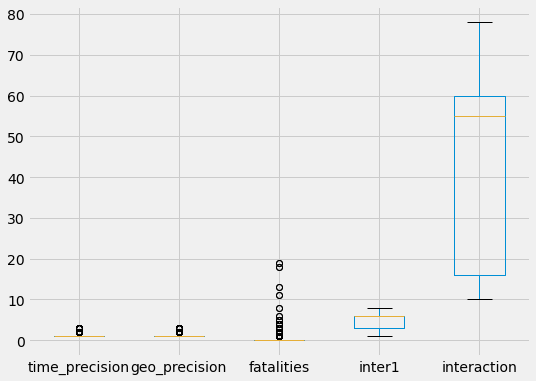

In [71]:
df_box = df[['time_precision','geo_precision','fatalities','inter1','interaction']]
df_box.plot(kind='box', figsize=(8,6), vert=True);

In [ ]:
a = 1

plt.figure(figsize=(20,25))

for i in features:
    plt.subplot(6,1,a)
    sns.boxplot(df2[i])
    a += 1
plt.show()

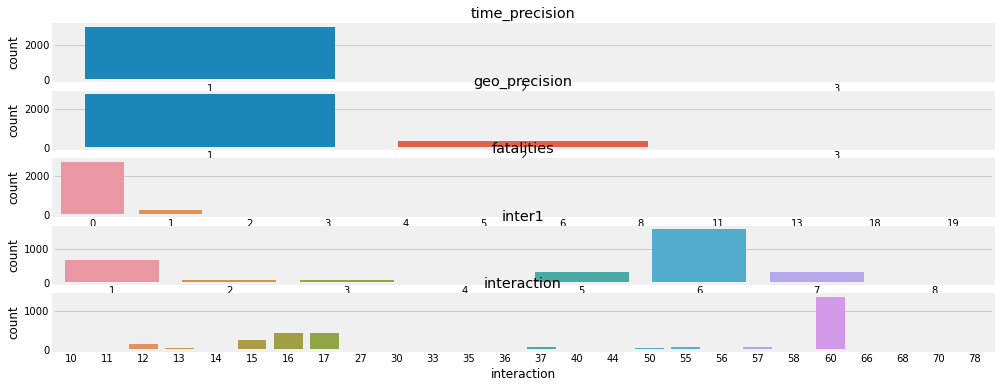

In [80]:
a = 1

plt.figure(figsize=(8,6))

for i in df_box.columns.tolist():
    plt.subplot(5,1,a)
    ax = sns.countplot(df_box)
    plt.title(i)
    a += 1
plt.show()

In [ ]:
sns.countplot()